# <font color='goldenrod'>4. Data Modeling</font>

### 4.1 Import Data and Required Packages

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer


import warnings

- **Import the CSV Data as Pandas DataFrame**

In [2]:
df = pd.read_csv("C:\\Users\\tarac\\Downloads\\Projects\\ml-project\\notebook\\data\\cancer_clean.csv")

df.head()

,target_deathrate,incidencerate,studypercap,medianage,pctnohs18_24,pcths18_24,pctbachdeg18_24,pcths25_over,pctunemployed16_over,pctprivatecoveragealone,pctasian,pctotherrace,birthrate
0,164.9,489.8,499.748204,39.3,11.5,39.5,6.9,23.2,8.0,NaN,4.821857,1.843479,6.118831
1,161.3,411.6,23.111234,33.0,6.1,22.4,7.5,26.0,7.8,53.8,2.246233,3.741352,4.333096
2,174.7,349.7,47.560164,45.0,24.0,36.6,9.5,29.0,7.0,43.5,0.465898,2.747358,3.729488
3,194.8,430.4,342.637253,42.8,20.2,41.2,2.5,31.6,12.1,40.3,1.161359,1.362643,4.603841
4,144.4,350.1,0.000000,48.3,14.9,43.0,2.0,33.4,4.8,43.9,0.665830,0.492135,6.796657


### 4.2 Split

- **Create a featute matrix named X. It should contain all the columns in the dataset except "target_deathrate".**

- **Create the target vector named y, which you'll use to train the model. Your target should be "target_deathrate". Remember that, in most cases your target vector should be one-dimensional.**

In [3]:
# dividing our dataset into features (X) and target (y)
X = df.drop(columns = ['target_deathrate']).values
y = df['target_deathrate'].values

print(X.shape)
print(y.shape)

(3047, 12)
(3047,)


In [4]:
# splitting into train and test sets 80-20
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 0)

### 4.3  Baseline model
- **Again, we need to set a baseline so we can evaluate a our model's performance. Calculate the mean of your target vector "y_train" and assign it to the variable "y_mean".**

In [5]:
y_mean = y_train.mean()
y_mean

178.94620434961016

- **We then create a list of predicitons where everything is the mean over and over again.**

In [6]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[178.94620434961016,
 178.94620434961016,
 178.94620434961016,
 178.94620434961016,
 178.94620434961016]

- **Calculate the baseline mean absolute error for your predicitons in "y_pred_baseline" as compared to the true targets in "y_train".**

In [7]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean target_deathrate", round(y_mean, 2))
print("Baseline MAE", round(mae_baseline, 2))

Mean target_deathrate 178.95
Baseline MAE 21.34


**Insight:**
- **What does this information tell us? If we always predicted that the target deathrate is 178.94, our predictions would be off by an average of 21.34. It also tells us that our model needs to have a mean absolute error below 21.34 in order to be useful.**

### 4.4  Iterate

- **The next step in building a model is iterating. This involves building a model, training it, evaluating it, and then repeating the process until you're happy with the model's performance. Even though the model we're building is linear, the iteration process rarely follows a straight line. Be prepared for trying new things, hitting dead-ends, and waiting around while your computer does long computations to train your model. © Let's get started!**

- **In addition to predictors like LinearRegression , scikit-learn also has transformers that help us deal with issues like missing values and encoding categorical values. Let's see how one works, and then we'll add it to our model.**

- **Create a pipeline named `model` that contains a `Simplelmputer` transformer followed by a `LinearRegression` predictor.**

In [8]:
# Create the pipeline using make_pipeline
model = make_pipeline(

    SimpleImputer(),
    Ridge(),
)

- **Fit your model to the data, X_train and y_train.**

In [9]:
model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

### 4.5  Evaluate

- **As always, we'll start by evaluating our model's performance using the training data.**

- **Using your model's `predict` method, create a list of predictions for the observations in your feature matrix `X_train`. Name this list `y_pred_training`.**

In [10]:
y_pred_training = model.predict(X_train)

- **Calculate the training mean absolute error for your predictions in `y_pred_training` as compared to the true targets in `y_train`.**

In [11]:
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Training MAE: 15.41
Baseline MAE: 21.34


In [12]:
ridge_y_prediction = model.predict(X_test)

In [13]:
# comparing the actual output values with the predicted values
ridge_compare = pd.DataFrame({
    'Actual' : y_test, 
    'Predicted' : ridge_y_prediction
})

# previewing 10 samples
ridge_compare.sample(10)

,Actual,Predicted
370,174.0,173.459692
122,195.0,195.891275
333,146.4,159.401064
230,193.6,176.242530
52,142.8,159.291617
405,218.3,213.676550
494,187.8,179.551524
466,138.4,168.470690
114,165.5,178.265585
527,206.3,181.449539


In [14]:
# Using Mean Absolute Error to evaluate the model

mae_testing = mean_absolute_error(y_test, ridge_y_prediction)
print("Training MAE:", round(mae_training, 2))
print("Testing MAE:", round(mae_testing, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Training MAE: 15.41
Testing MAE: 15.36
Baseline MAE: 21.34


- **Mean Absolute Error (MAE) is a commonly used metric for evaluating the performance of regression models. The lower the MAE value, the better the model is at predicting the target values.**

- **In this case, the training MAE is 15.41, which means that on average, the model's predictions are off by 15.41 units from the actual target values during training. The testing MAE is 15.36, which means that on average, the model's predictions are off by 15.36 units from the actual target values during testing.**

- **The baseline MAE is 21.34, which means that if we were to use a very simple baseline model (for example, always predicting the mean of the target values), the average error would be 21.34 units.**

- **Comparing these values, we can see that the model we trained performs better than the baseline model, as the MAE values are lower. Additionally, the difference between the training MAE and the testing MAE is relatively small (0.05), which suggests that the model is not overfitting (i.e., memorizing the training data) and has a good ability to generalize to new data.**

- **Again, we want our test performance to be about the same as our training performance. But it's OK' if its not as good.**

In [15]:
# Using Coeffecient of Determination (R^2) to evaluate the model

r2_testing = r2_score(y_test, ridge_y_prediction)


print("Training R^2:", round(r2_score(y_train, y_pred_training), 2))
print("Testing R^2:", round(r2_testing, 2))

Training R^2: 0.44
Testing R^2: 0.5


- **Our model returned a R-squared score of 0.5 meaning the regression model fit `50%` of the data.**

In [16]:
# evaluating model performance using Root Mean Squared Error (RMSE)
from sklearn import metrics 
print('Ridge Regressor Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ridge_y_prediction)))

print("10% of target death rate mean:", df['target_deathrate'].mean() * 0.1)

Ridge Regressor Root Mean Squared Error: 19.85791229786431
10% of target death rate mean: 17.866406301279945


- **Our model was somewhat accurate, as evident by the fact that the RMSE score is just slightly higher than 10% of the mean of our target variable.**

# <font color='goldenrod'>5. Communicate Results</font>

### 5.1 Feature Importance

In [17]:
# intercept = model.named_steps =['ridge'].intercept_
coeffecients = model.named_steps['ridge'].coef_

print("Coeffecients len:", len(coeffecients))
print(coeffecients[:5])  # First five coeffecients

Coeffecients len: 12
[ 0.20320913 -0.00053211 -0.01852553 -0.04315459  0.15488658]


In [18]:
# Get the coefficients from the model
coefficients = model.named_steps['ridge'].coef_


# Create a dataframe with the coefficients
coefficients_df = pd.DataFrame({
    'feature': df.drop(columns = ['target_deathrate']).columns,
    'coefficient': coefficients
})

coeffecients_df = pd.DataFrame(coefficients_df)

coeffecients_df

,feature,coefficient
0,incidencerate,0.203209
1,studypercap,-0.000532
2,medianage,-0.018526
3,pctnohs18_24,-0.043155
4,pcths18_24,0.154887
5,pctbachdeg18_24,-0.468098
6,pcths25_over,0.926768
7,pctunemployed16_over,1.656677
8,pctprivatecoveragealone,-0.476384
9,pctasian,0.133398


- **The coefficients in a regression model represent the strength of the relationship between each feature and the dependent variable. A positive coefficient indicates that an increase in the feature value is associated with an increase in the dependent variable value, while a negative coefficient indicates that an increase in the feature value is associated with a decrease in the dependent variable value.**

- **The given set of features and coefficients represents a multiple linear regression model. Each coefficient represents the effect that a one-unit increase in the corresponding feature has on the predicted cancer death rate.**

In [19]:
# Sort the dataframe by the coefficients
coefficients_df = coefficients_df.sort_values(by = 'coefficient', ascending = False)
coefficients_df

,feature,coefficient
7,pctunemployed16_over,1.656677
6,pcths25_over,0.926768
0,incidencerate,0.203209
4,pcths18_24,0.154887
9,pctasian,0.133398
1,studypercap,-0.000532
2,medianage,-0.018526
3,pctnohs18_24,-0.043155
5,pctbachdeg18_24,-0.468098
8,pctprivatecoveragealone,-0.476384


In [32]:
import plotly.graph_objs as go
import plotly.io as pio
import pandas as pd
import seaborn as sns
import matplotlib.colors as mcolors

# Define a custom color palette
# custom_palette = sns.color_palette("husl", len(coefficients_df))
custom_palette = sns.color_palette("Set1", len(coefficients_df))

# Convert the color palette to a list of hex color codes
colors = [mcolors.rgb2hex(custom_palette[i]) for i in range(len(custom_palette))]

# Create the trace for the bar plot
trace = go.Bar(
    x=coefficients_df['coefficient'],
    y=coefficients_df['feature'],
    orientation='h',
    marker=dict(
        color=colors
    )
)

# Create the layout for the plot
layout = go.Layout(
    title='Feature Importance',
    xaxis=dict(title='Coefficient'),
    yaxis=dict(title='Feature')
)

# Set the width and height of the plot
layout.width = 1600
layout.height = 600


# Create the figure object and add the trace and layout
fig = go.Figure(data=[trace], layout=layout)

# Show the plot
pio.show(fig)

**Insights:**
- **Based on these coefficients, we can infer that certain features have a stronger impact on the predicted cancer death rate than others. For example, the percentage of the population that is unemployed and over the age of 16 (pctunemployed16_over) has the largest coefficient, indicating that it has the strongest impact on the predicted cancer death rate. Other features, such as studypercap and medianage, have smaller coefficients, indicating that they have a weaker impact on the predicted cancer death rate.**

- **Overall, while we can interpret the coefficients of the model, we cannot fully evaluate its performance without access to additional metrics such as R-squared, MSE, RMSE, and MAE, as well as actual target values to compare the predicted values against.**

**Additional Insights:**
    
- **A 1% increase in the percentage of unemployed people aged 16 and over is associated with a 1.66% increase in the dependent variable.**
- **A 1% increase in the percentage of people with a high school diploma or equivalent aged 25 and over is associated with a 0.93% increase in the dependent variable.**
- **A 1% increase in the incidence rate of a particular disease is associated with a 0.20% increase in the dependent variable.**
- **A 1% increase in the percentage of people with a bachelor's degree aged 18 and 24 is associated with a 0.15% increase in the dependent variable.**
- **A 1% increase in the percentage of Asian people is associated with a 0.13% increase in the dependent variable.**
- **A 1% increase in the number of study hours per capita is associated with a 0.001% decrease in the dependent variable.**
- **A 1% increase in the median age is associated with a 0.02% decrease in the dependent variable.**
- **A 1% increase in the percentage of people without a high school diploma aged 18 and 24 is associated with a 0.04% decrease in the dependent variable.**
- **A 1% increase in the percentage of people with a bachelor's degree aged 18 and 24 is associated with a 0.47% decrease in the dependent variable.**
- **A 1% increase in the percentage of people with private health insurance coverage is associated with a 0.48% decrease in the dependent variable.**
- **A 1% increase in the percentage of people of other races is associated with a 0.48% decrease in the dependent variable.**
- **A 1% increase in the birthrate is associated with a 0.56% decrease in the dependent variable.**


### 5.2 Residual Plots & Heteroscedasticity

In [38]:
# create residuals by substracting the test value from the predicted value for each row in our dataset
residuals = np.subtract(ridge_y_prediction, y_test)

# converting the residuals array into a dataframe
residuals_df = pd.DataFrame(residuals)

# previewing the summary statistics
residuals_df.describe()

,0
count,610.000000
mean,-0.127399
std,19.873800
min,-75.582998
25%,-11.158042
50%,0.196448
75%,13.228039
max,61.652040


- **We will plot our residuals on a scatter plot. If the points in the residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a nonlinear model is more appropriate.**

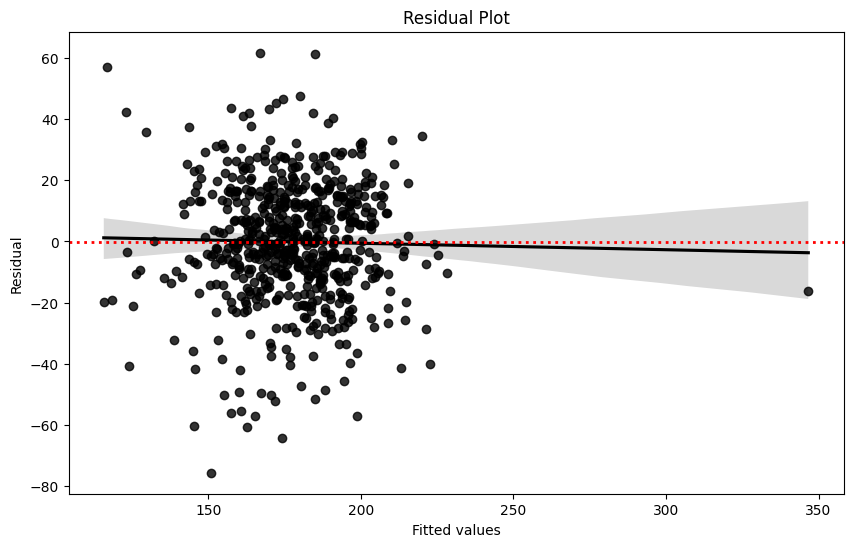

In [22]:
# plotting our residuals
plt.figure(figsize=(10,6))
sns.regplot(x=ridge_y_prediction, y=residuals, color='black')
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.title('Residual Plot')
plt.axhline(y = residuals.mean(), color='red', linewidth = 2, linestyle = "dotted")
plt.show()

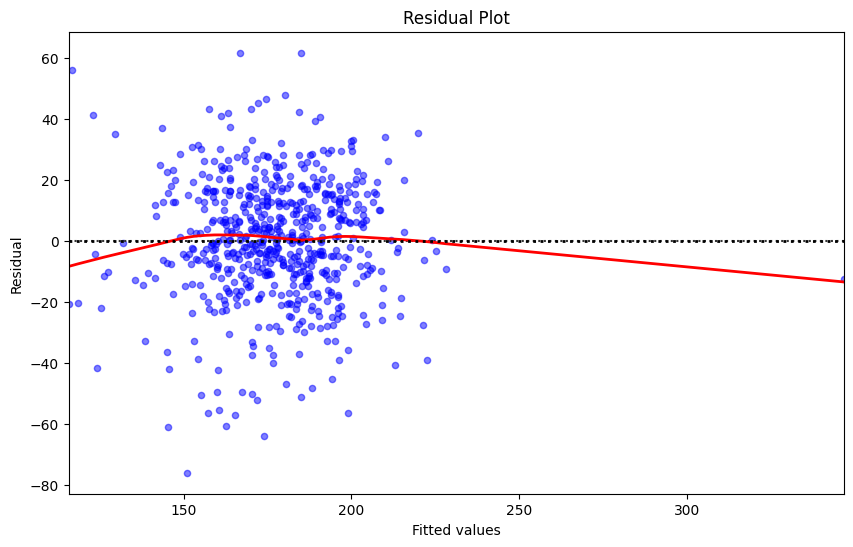

In [23]:
# plotting our residuals
plt.figure(figsize=(10,6))
sns.residplot(x=ridge_y_prediction, y=residuals, lowess=True, scatter_kws={'s': 20, 'alpha': 0.5, 'color': 'blue'}, line_kws={'color': 'red', 'linewidth': 2})
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.title('Residual Plot')
plt.axhline(y = residuals.mean(), color='black', linewidth = 2, linestyle = "dotted")
plt.show()




- **`lowess` is a nonparametric regression method that fits a smooth curve to a scatterplot. Fitted to the residuals to visualize any non-linear patterns in the data.**

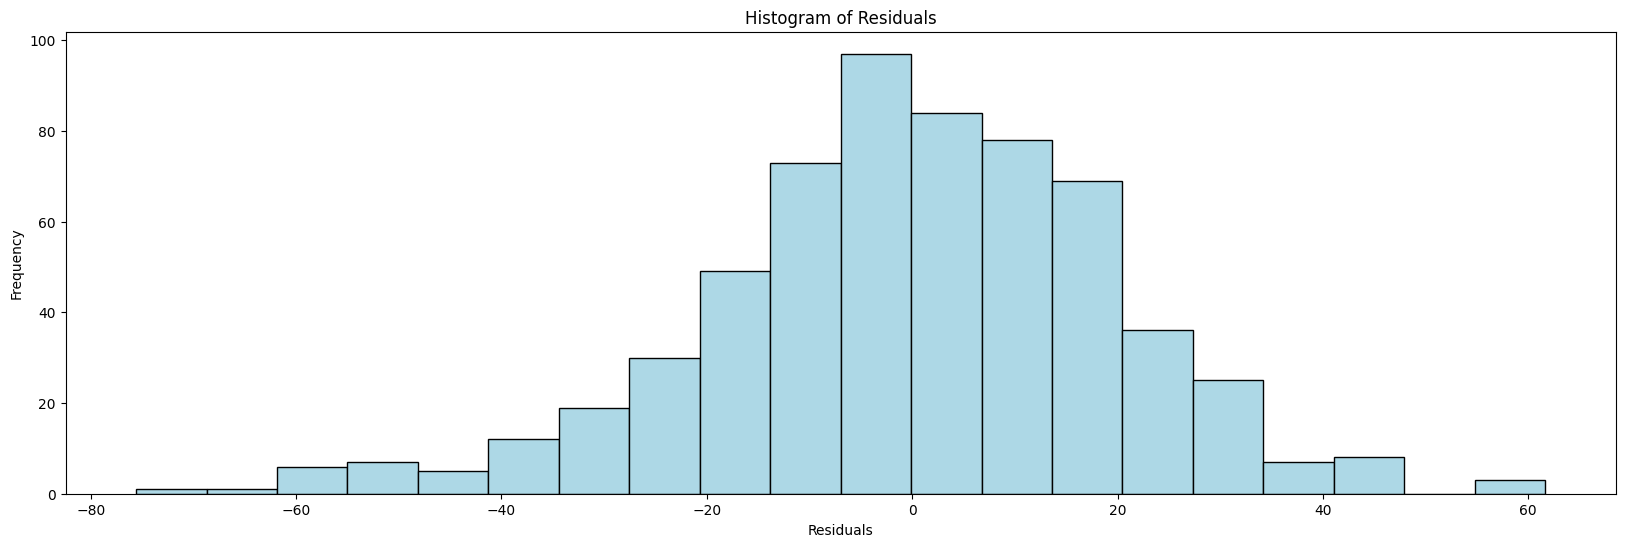

In [25]:
# Plot the histogram of residuals
plt.figure(figsize=(20,6))
plt.hist(residuals, bins=20, edgecolor='black', color='lightblue')


# Add labels and title to the plot
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

# Show the plot
plt.show()

- **We see that a lot of values are scattered around the mean while a fairly large amount are spread further apart from the mean, meaning that there are no obvious patterns. We will go ahead and perform a test for heteroscedasticity to be certain. We will use Bartlett's Test to test the null hypothesis that the variances in this dataset are homogeneous (equal).**

- **A heteroscedasticity test is a statistical test that is used to determine whether the variance of the residuals in a regression model is constant. If the variance of the residuals is not constant, then the model is said to be heteroscedastic. Heteroscedasticity can be a problem in regression analysis, as it can lead to inaccurate estimates of the model parameters. There are a number of different heteroscedasticity tests that can be used, and the choice of test will depend on the specific data set and the type of regression model that is being used.**

- **This is a hypothesis test that establishes a null hypothesis that the variance is equal for all our datapoints,and the alternative hypothesis is that at least one of the variances is different.**

- **The test uses the chi-squared distribution to calculate the test statistic and make a decision about the null hypothesis.**

In [26]:
import scipy as sp

# using the scipy bartlett function to get our test result and p-value
test_result, p_value = sp.stats.bartlett(ridge_y_prediction, residuals)

# computing the critical value of a chi-squared distribution
degree_of_freedom = len(ridge_y_prediction) - 1
prob = 1 - p_value
critical_value = sp.stats.chi2.ppf(prob, degree_of_freedom)

print("Critical value:", critical_value)

Critical value: 597.9806418149155


- **If the test result of our Bartlett test is greater than the critical value of the chi-squared distribution, then we will reject our null value and conclude that the variances in our dataset are not equal, i.e., they are heterogeneous. Otherwise, we will accept that this dataset's variances are homogeneous.**

In [28]:
import scipy.stats as sp
# Bartlett's test
test_result, p_value = sp.bartlett(ridge_y_prediction, residuals)

# To interpret the results, we use a critical value of 0.05
alpha = 0.05

print('**Test statistic = {}**'.format(test_result))
print('**p-value = {}**'.format(p_value))

if p_value < alpha:
    print('**The null hypothesis can be rejected. The variances are not equal, so the model is heteroscedastic.**')
else:
    print('**The null hypothesis cannot be rejected. The variances are equal, so the model is homoscedastic.**')

**Test statistic = 0.24960653879798966**
**p-value = 0.617352261906841**
**The null hypothesis cannot be rejected. The variances are equal, so the model is homoscedastic.**


### 5.3 QQ-plot to check for normality of the residuals.

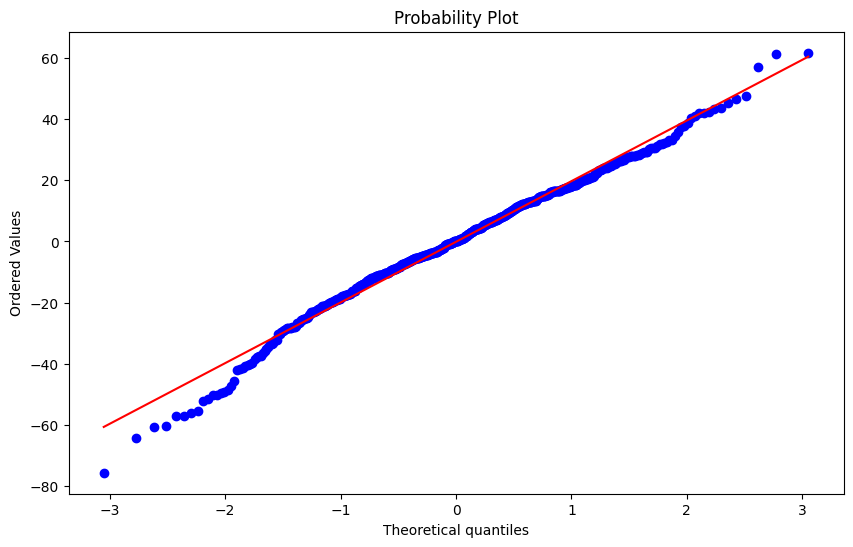

In [33]:
# plotting our QQ-plot
# plt.figure(figsize=(20,6))
fig, ax = plt.subplots(figsize=(10,6))
sp.probplot(residuals, dist='norm', plot=ax)
plt.show()

- **A QQ-plot is a probability plot that is used to check if a data set comes from a particular distribution. In this case, we will use a normal distribution.**
- **If the data points fall on the line, then the data is normally distributed. If the data points fall above or below the line, then the data is not normally distributed.**
- **The QQ-plot is a scatter plot of the quantiles of the data against the quantiles of the normal distribution.**
- **If the data comes from a normal distribution, the points in the QQ-plot should fall approximately on a straight line.**